## Méthode : Particle Filter (PF)

Ce notebook présente l'utilisation du fichier `pf.py` pour assimiler des données


In [1]:
import sys
sys.path.insert(0, '..\SOURCE')

from PfWoFost import PfWoFoSt
import numpy as np
import datetime as dt
import pandas as pd
import pcse
from pcse.models import Wofost72_WLP_FD

from dataloader import Dataloader
import os

from pcse.base import ParameterProvider
from utils import *

# Pour eviter les warnings intempestifs
import warnings
warnings.filterwarnings('ignore')

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

# 1 - Paramètres de WOFOST

Dans cette partie, on va charger les paramètres qui serviront à modéliser le champ avec Wofost.
Dans cet exemple, on va essayer de simuler le champ de notre client

In [2]:
dataloader = Dataloader("data")

# ===  1 - Crop Data ===
dataloader.printCropNames()
dataloader.printCropVarietes('potato')

cropd = dataloader.getCropData('potato', 'Innovator')
# Alternativement, vous pouvez charger un fichier
# cropd = dataloader.readCropData("POT701.CAB")



# === 2 - Paramètres du sol ===
# Chargé depuis un fichier
# 1. **EC1-Coarse**
# 2. **EC2-Medium**
# 3. **EC3-Medium Fine**
# 4. **EC4-Fine**
# 5. **EC5-Very Fine**
# 6. **EC6-Fine and Permeable (Peat)**
soild = dataloader.readSoilData("ec3.soil")

# === 3 - Paramètres du site ===
# Il s'agit des paramètres du site, indépendamment de l'espèce
#        - WAV       Initial amount of water in total soil profile [cm] <- OBLIGATOIRE
#        - IFUNRN    Indicates whether non-infiltrating fraction of rain is a function of storm size (1)
#                    or not (0). Default 0
#        - NOTINF    Maximum fraction of rain not-infiltrating into the soil [0-1], default 0.
#        - SSMAX     Maximum depth of water that can be stored on the soil surface [cm]
#        - SSI       Initial depth of water stored on the surface [cm]
#        - SMLIM     Initial maximum moisture content in initial rooting depth zone [0-1], default 0.4
sited = dataloader.getSiteData(WAV=10)


# === 4 - Agromanagement ===
agrod = dataloader.readAgromanagementData('osiris_rampe_cleaned.agro')

# === 5 - Météo ===
weatherd = dataloader.getWeatherData(lat=49.5652319502033, lon=2.4757816885380457)

# On rassemble tout
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

Voici la liste des espèces disponibles :
['barley', 'cassava', 'chickpea', 'cotton', 'cowpea', 'fababean', 'groundnut', 'maize', 'millet', 'mungbean', 'pigeonpea', 'potato', 'rapeseed', 'rice', 'sorghum', 'soybean', 'sugarbeet', 'sugarcane', 'sunflower', 'sweetpotato', 'tobacco', 'wheat', 'seed_onion']
Voici la liste des variétés disponibles pour : potato
['Potato_701', 'Potato_702', 'Potato_703', 'Potato_704', 'Innovator', 'Fontane', 'Markies', 'Premiere', 'Festien']


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

## 2 - Simulation

On peut maintenant prédire avec WoFOST

In [3]:
wofost_noDA = getWofost_WaterLimited(parameters, weatherd, agrod)
wofost_noDA.run_till_terminate()
df_wofost_noDA = pd.DataFrame(wofost_noDA.get_output())
df_wofost_noDA = df_wofost_noDA.set_index("day")
df_wofost_noDA.tail()

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2022-10-02,1.983857,0.0,15561.13719,12050.586227,1857.265611,1653.285351,1441.889672,0.0,50.0,0.210785,22.854223
2022-10-03,1.989233,0.0,15561.13719,12050.586227,1857.265611,1653.285351,1441.889672,0.0,50.0,0.233511,23.990529
2022-10-04,1.993524,0.0,15561.13719,12050.586227,1857.265611,1653.285351,1441.889672,0.0,50.0,0.231742,23.902066
2022-10-05,1.998490,0.0,15561.13719,12050.586227,1857.265611,1653.285351,1441.889672,0.0,50.0,0.230323,23.831142
2022-10-06,2.000000,0.0,15561.13719,12050.586227,1857.265611,1653.285351,1441.889672,0.0,50.0,0.229986,23.814270


# 3 - Observations

On va réaliser des observations pour améliorer notre simulation : c'est la data assimilation.

Dans cette partie, on va utiliser les observations du client

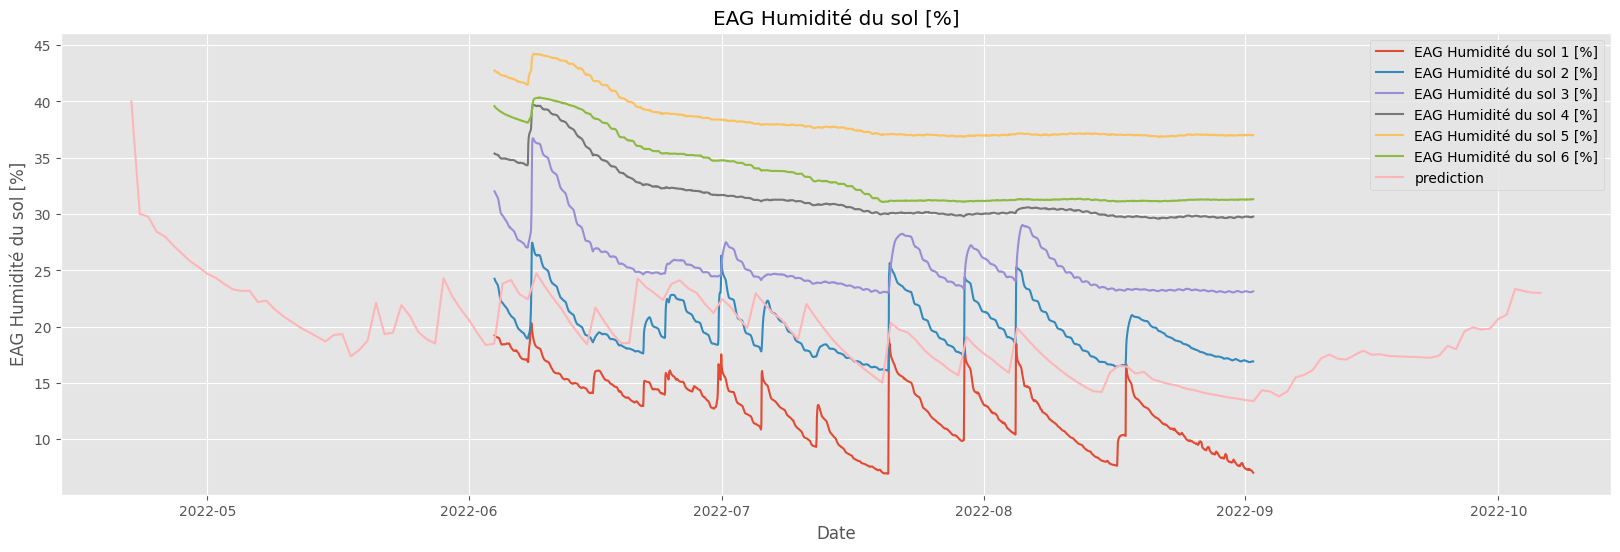

In [4]:
import matplotlib.pyplot as plt

df_obs = dataloader.readOsirisData('Sonde Rampe 1.csv')
df_obs = df_obs[df_obs['Date/heure'] < pd.Timestamp("2022-09-02")]
df_obs = df_obs[df_obs['Date/heure'] > pd.Timestamp("2022-06-04")]

plt.figure(figsize=(20, 6))

for i in range(1, 7):
    column_name = f'EAG Humidité du sol {i} [%]'
    plt.plot(df_obs['Date/heure'],df_obs[column_name], label=column_name)
    
plt.plot(df_wofost_noDA.index, df_wofost_noDA['SM']*100, label='prediction')
plt.title("EAG Humidité du sol [%]")
plt.xlabel('Date')
plt.legend()
plt.ylabel("EAG Humidité du sol [%]")
plt.grid(True)
plt.show()

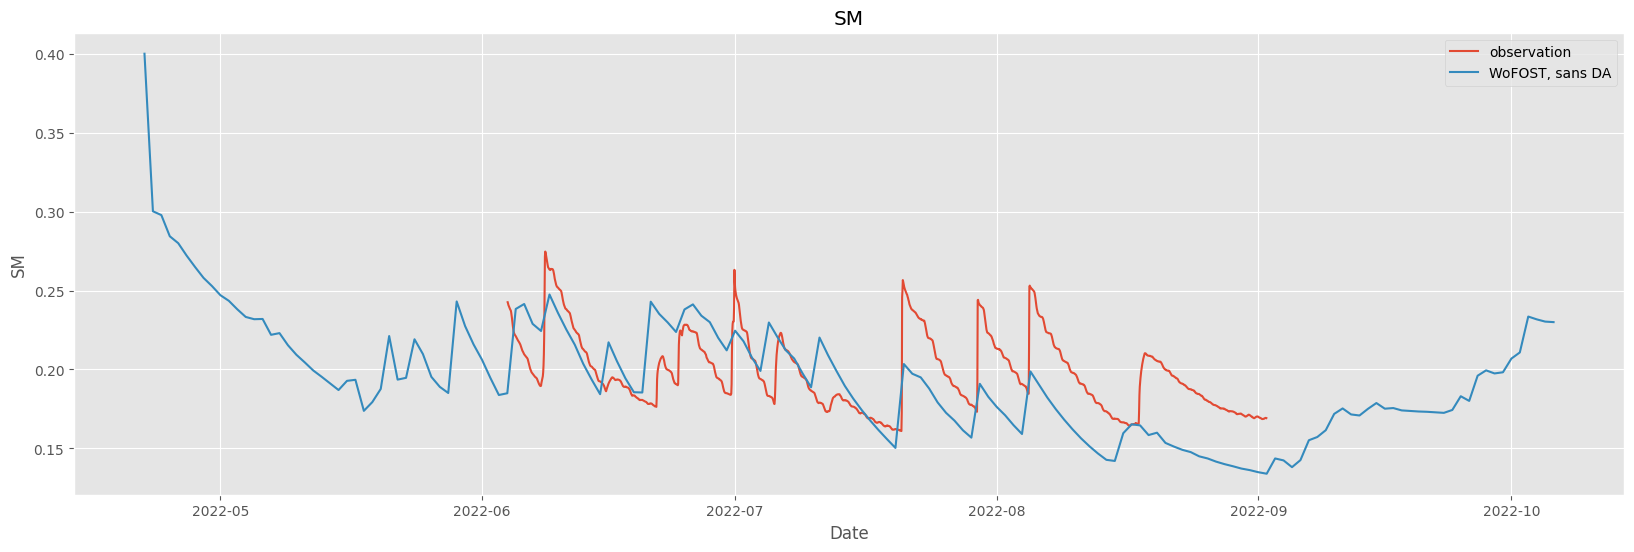

In [5]:
plt.figure(figsize=(20, 6))

plt.plot(df_obs['Date/heure'], df_obs['SM'], label = 'observation')
plt.plot(df_wofost_noDA.index, df_wofost_noDA['SM'], label='WoFOST, sans DA')
plt.title("SM")
plt.xlabel('Date')
plt.legend()
plt.ylabel("SM")
plt.grid(True)
plt.show()

range1=(150.,50.)
range2=(4.5,1.5)
range3=(31,3)
range4=(0.31,0.03)

Pour mesurer l'effet de la fréquence des mesures, on va échantilloner les données à notre disposition

<AxesSubplot: title={'center': 'DVS'}, xlabel='day'>

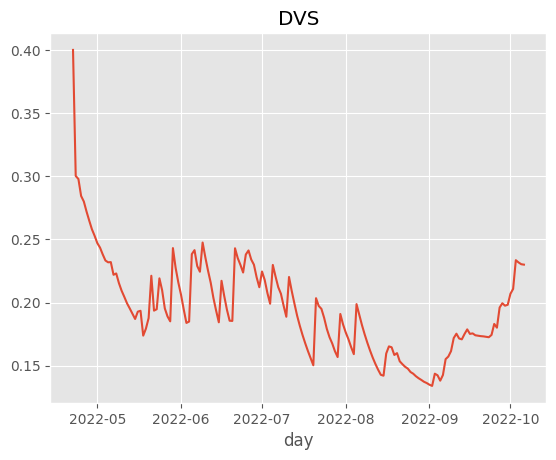

In [6]:
df_wofost_noDA['SM'].plot(y='DVS', title='SM')

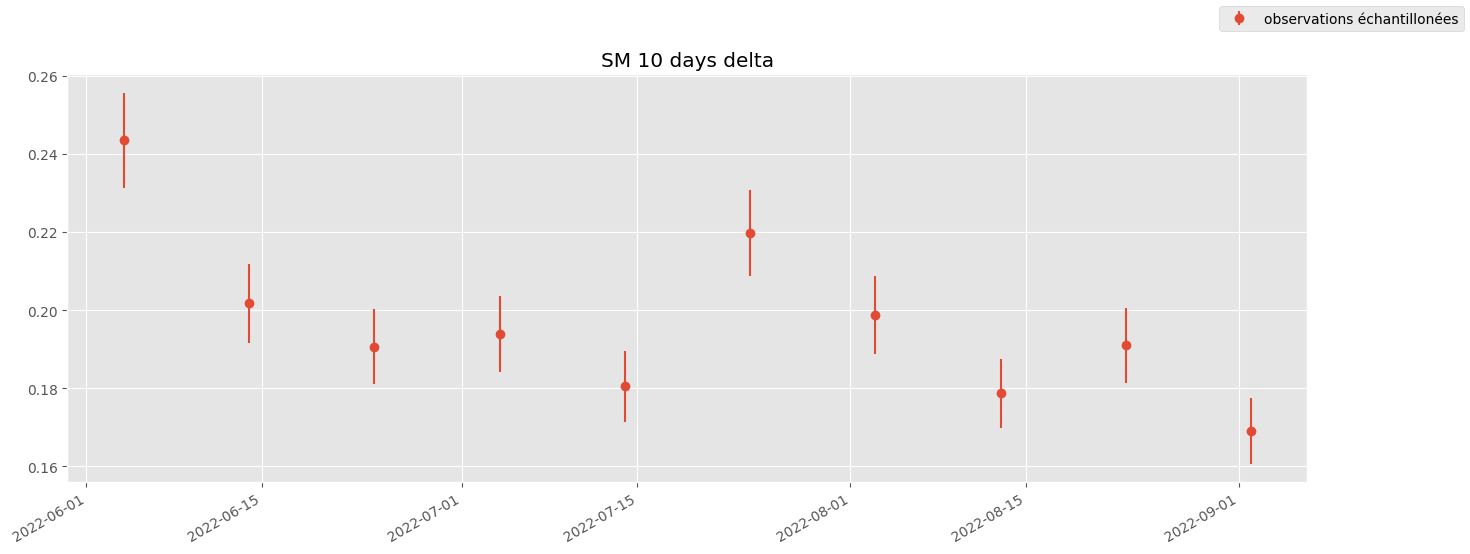

In [7]:
NB_DAYS_DELTA = 10
dates_of_observation, observed_sm = dataloader.getOsirisSM(filename = 'Sonde Rampe 1.csv', timedelta = pd.Timedelta(NB_DAYS_DELTA, "d"), error = 0.0, begin = pd.Timestamp("2022-06-04"), end = pd.Timestamp("2022-09-02"))

observed_sm = np.array(observed_sm)
std_sm = observed_sm * 0.05 # Std. devation is estimated as 5% of observed value

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6), sharex=True)
axes.errorbar(dates_of_observation, observed_sm, yerr=std_sm, fmt="o", label='observations échantillonées')
axes.set_title("SM "+str(NB_DAYS_DELTA)+" days delta")
fig.autofmt_xdate()
fig.legend()

observations_for_DA = [(d, {"SM": (sm, errsm)}) for d, sm, errsm in zip(dates_of_observation, observed_sm, std_sm)]


## 4 - PF

On peut maintenant utiliser le PF. Commençons par spécifier les paramètres sur lesquels nous avons un doute.

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth


=====[Assimilate] Currently on observation 1/10 with 100 particles
Date 2022-06-04 00:00:00, values:{'SM': (0.24350000000000002, 0.012175000000000002)}


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

[Assimilate] Updated weights. Current SM estimate:  (0.388638249729859, 0.0019072011290676048)

=====[Assimilate] Currently on observation 2/10 with 100 particles
Date 2022-06-14 00:00:00, values:{'SM': (0.2018, 0.010090000000000002)}
[Assimilate] Updated weights. Current SM estimate:  (0.3881177063015424, 0.001963856359751647)

=====[Assimilate] Currently on observation 3/10 with 100 particles
Date 2022-06-24 00:00:00, values:{'SM': (0.1907, 0.009535000000000002)}


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

[Assimilate] Updated weights. Current SM estimate:  (0.3878614435757539, 0.0018912250130230215)

=====[Assimilate] Currently on observation 4/10 with 100 particles
Date 2022-07-04 00:00:00, values:{'SM': (0.19399999999999998, 0.0097)}


  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\noe\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\noe\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start()
  File "C:\Users\noe\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
    self._run_once()
 

[Assimilate] Updated weights. Current SM estimate:  (0.3868390347486589, 0.0021182411948661027)

=====[Assimilate] Currently on observation 5/10 with 100 particles
Date 2022-07-14 00:00:00, values:{'SM': (0.1805, 0.009025)}
[Assimilate] Updated weights. Current SM estimate:  (0.38588397077869097, 0.002285959449153367)

=====[Assimilate] Currently on observation 6/10 with 100 particles
Date 2022-07-24 00:00:00, values:{'SM': (0.2198, 0.01099)}
[Assimilate] Updated weights. Current SM estimate:  (0.38530806635244225, 0.0023617268322114046)

=====[Assimilate] Currently on observation 7/10 with 100 particles
Date 2022-08-03 00:00:00, values:{'SM': (0.19879999999999998, 0.00994)}


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

[Assimilate] Updated weights. Current SM estimate:  (0.3841310131288968, 0.0026367241967191596)

=====[Assimilate] Currently on observation 8/10 with 100 particles
Date 2022-08-13 00:00:00, values:{'SM': (0.1787, 0.008935)}


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth

[Assimilate] Updated weights. Current SM estimate:  (0.38280050496406914, 0.0029190855683957446)

=====[Assimilate] Currently on observation 9/10 with 100 particles
Date 2022-08-23 00:00:00, values:{'SM': (0.191, 0.009550000000000001)}
[Assimilate] Updated weights. Current SM estimate:  (0.3817986704740063, 0.0030665974968068074)


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\noe\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\noe\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\noe\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\noe\AppData\Roaming\Pyth


=====[Assimilate] Currently on observation 10/10 with 100 particles
Date 2022-09-02 00:00:00, values:{'SM': (0.16920000000000002, 0.00846)}
[Assimilate] Updated weights. Current SM estimate:  (0.38011114510239996, 0.0034353801081590564)


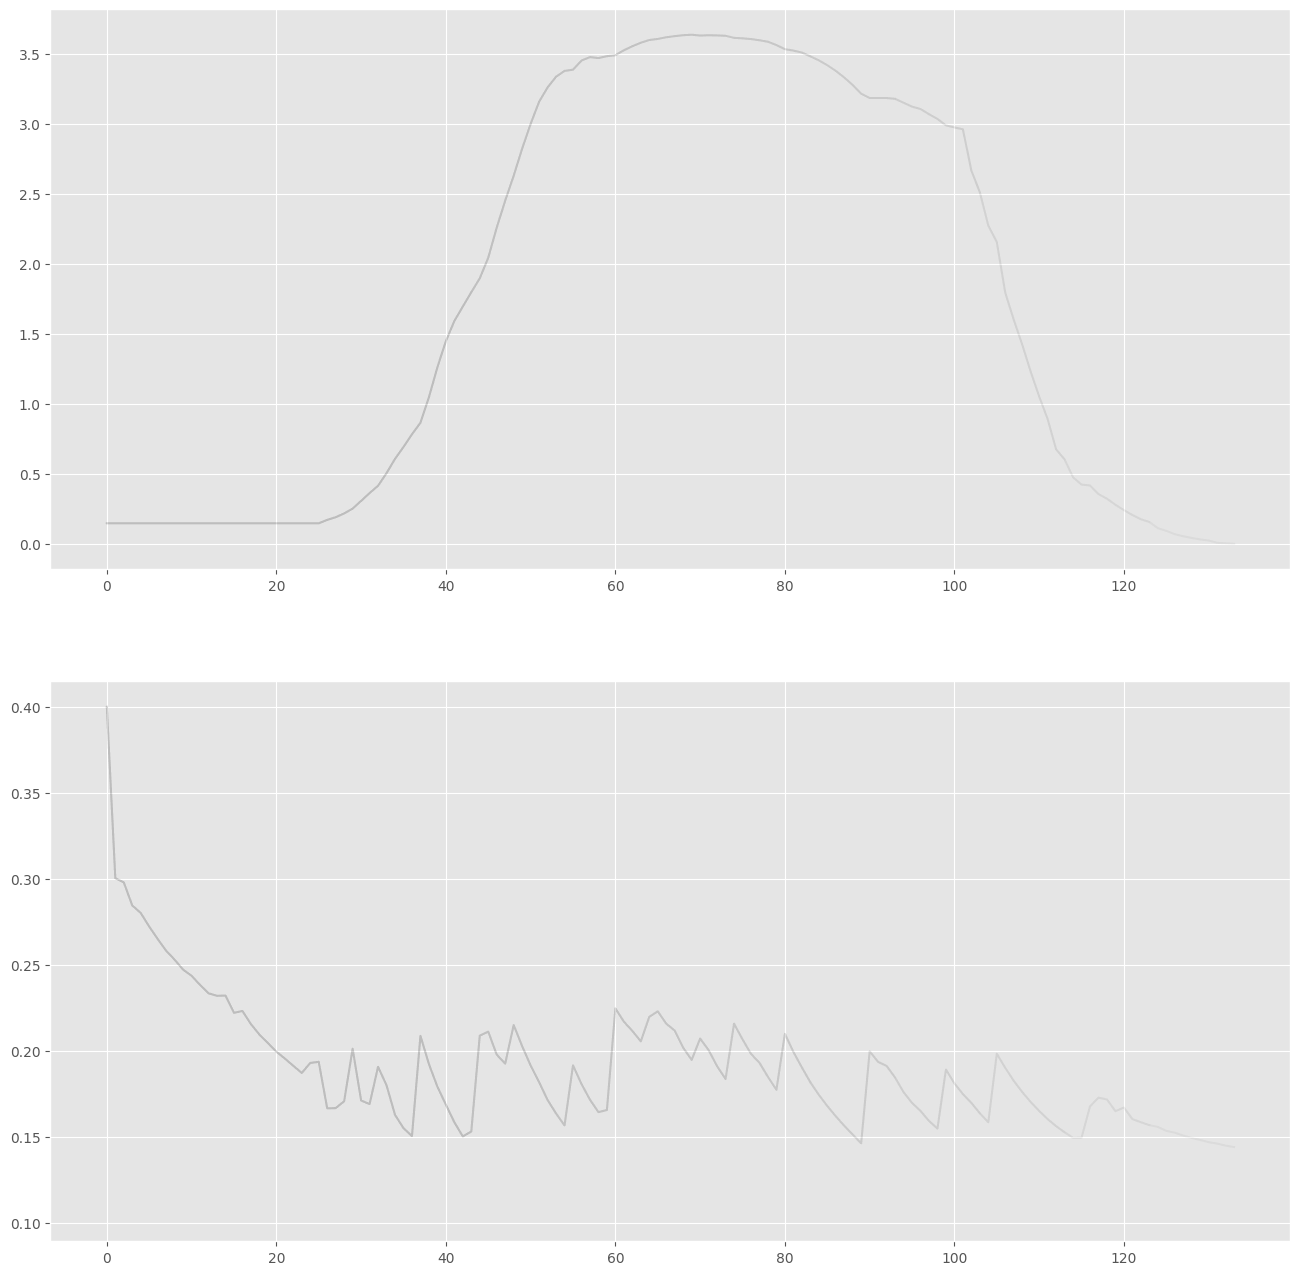

In [8]:

# Appelons maintenant le filtre particulaire
N   = 100
pf  = PfWoFoSt(ensemble_size=N,
              override_parameters=("TDWI","WAV","SPAN","SMFCF"),
              override_ranges=(range1,range2,range3,range4),
              parameters=parameters, weather=weatherd, agromanagement=agrod)
start_date = pf.get_current_date()
df_enkf_NODA = pf.getResultsNoDA()
pf.get_particles_last_value()
pf.batchAssimilate(observations_for_DA)

Comparons avec les données observées :

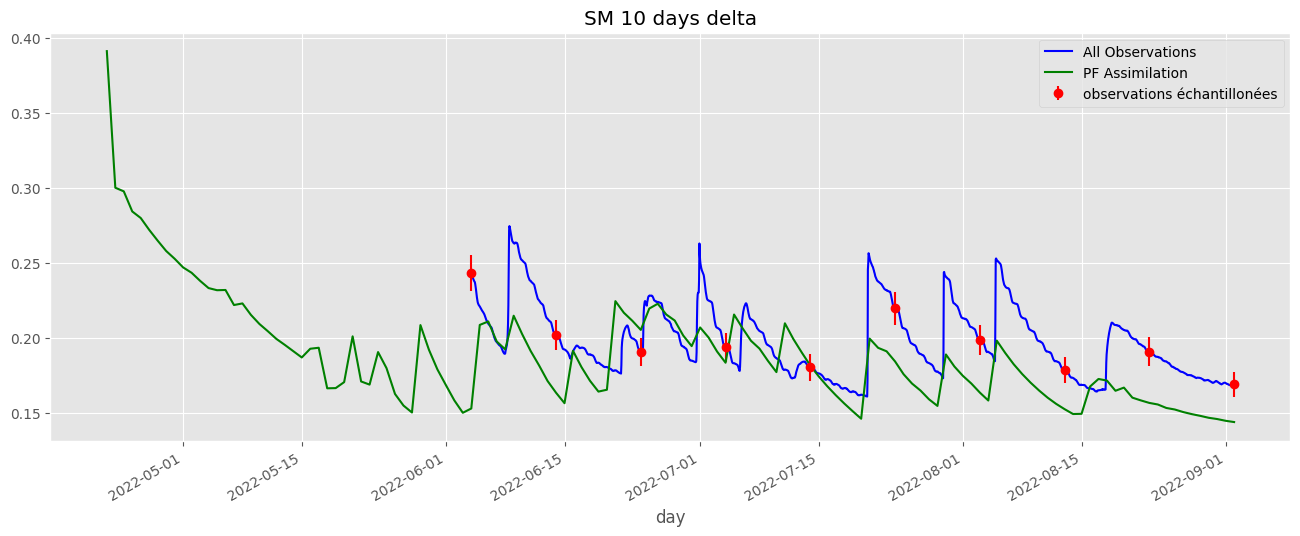

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6), sharex=True)

# courbe avec toutes les observations (la réalité)
axes.plot(df_obs['Date/heure'], df_obs["SM"], label="All Observations", color='b')
# courbe avec les observations échantillonées
axes.errorbar(dates_of_observation, observed_sm, yerr=std_sm, fmt="o", label='observations échantillonées', color='RED')
# courbe avec WOFOST sans aucune correction
# df_wofost_noDA["SM"].plot(ax=axes, label="Wofost, sans DA", color="red")

# courbe avec les résultats du PF
results = pf.get_df()
results.plot(y='SM',ax=axes,label='PF Assimilation',color='green')

axes.set_title("SM "+ str(NB_DAYS_DELTA) +" days delta")
axes.legend()
fig.autofmt_xdate()


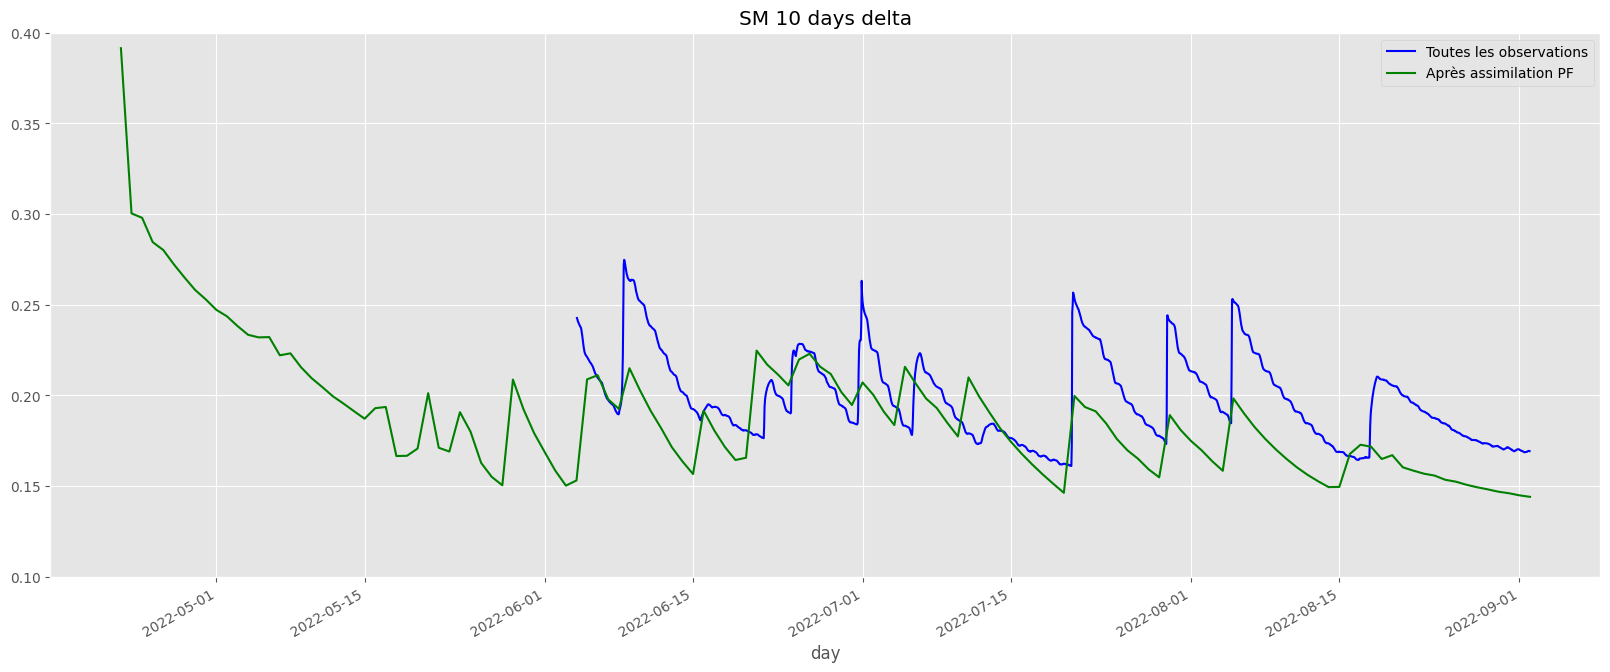

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), sharex=True)

axes.plot(df_obs['Date/heure'], df_obs["SM"], label="Toutes les observations", color='b')


results['SM'].plot(ax=axes, label="Après assimilation PF", color='g')


axes.set_title("SM "+str(NB_DAYS_DELTA)+" days delta")
fig.autofmt_xdate()
axes.set_ylim([0.1, 0.4])

axes.legend()

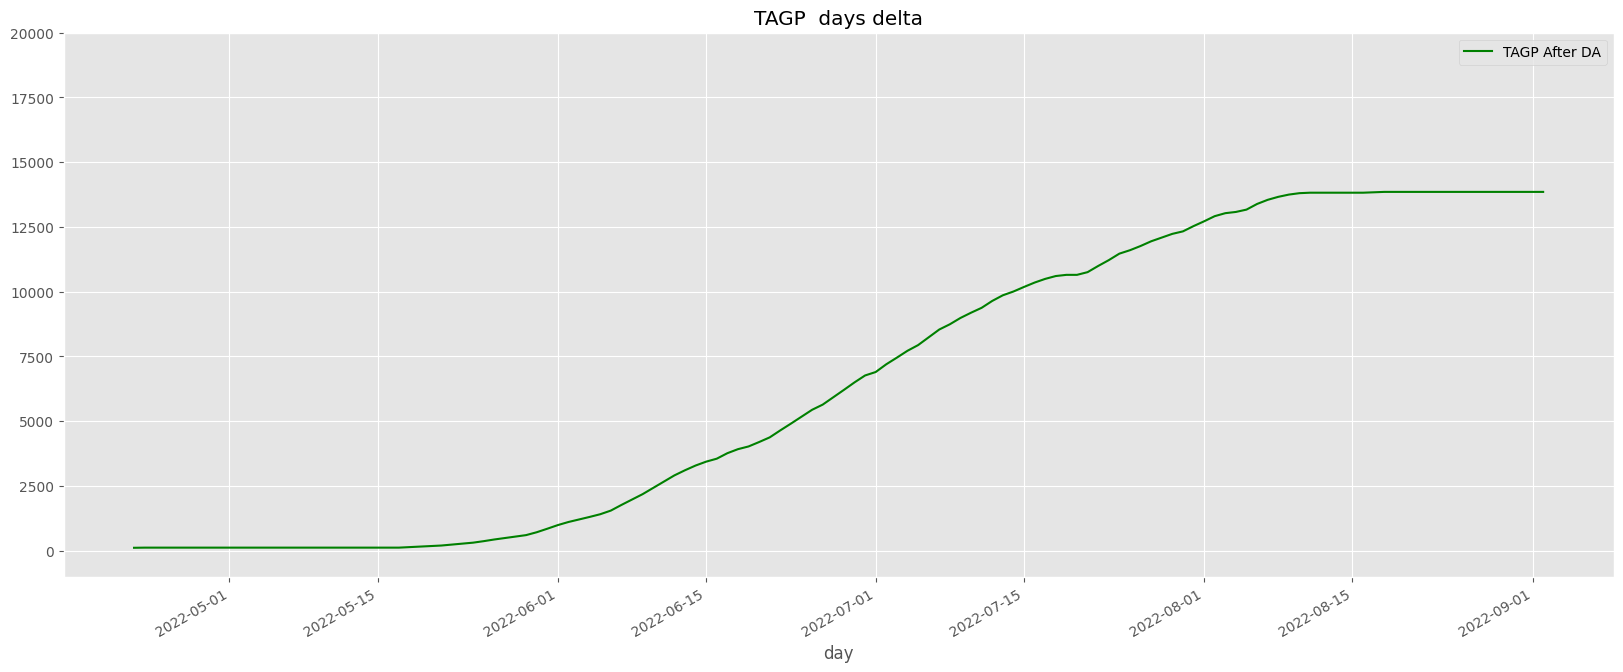

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), sharex=True)
results['TAGP'].plot(ax=axes, label="TAGP After DA", color='g')

#axes.errorbar(dates_of_observation, observed_sm, yerr=std_sm, fmt="x", alpha=0.8, color='gray')
axes.set_title("TAGP "+str( )+" days delta")
axes.set_ylim([-1000, 20000])
fig.autofmt_xdate()

axes.legend()

Nous allons évaluer le RMSE des résultats assimilé.

In [12]:
type(dates_of_observation[0])

pandas._libs.tslibs.timestamps.Timestamp

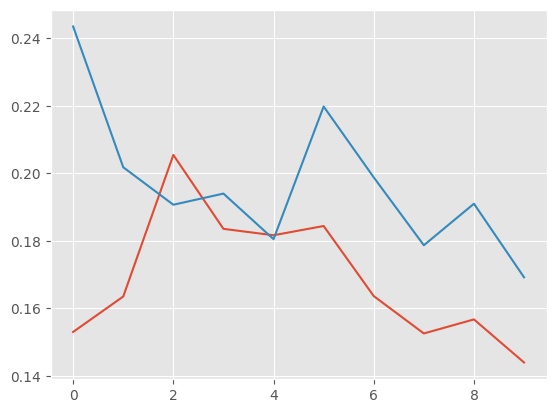

In [13]:
SM_obs = df_obs['SM'].to_numpy()
SM_DA = []

SM_obs = pd.DataFrame({'date':df_obs['Date/heure'], 'SM':df_obs["SM"]})
SM_obs['SM'][SM_obs['date'].isin(dates_of_observation)]

for element in results.index:
    if element in dates_of_observation:
            SM_DA.append(results.loc[element]['SM'])

plt.plot(SM_DA)

plt.plot([element[1]['SM'][0] for element in observations_for_DA])

#df_enkf_NODA['SM'].plot(ax=axes, label="Before DA", color='r')
# results['SM'].plot(ax=axes, label="Après assimilation PF", color='g')


In [14]:
df_obs_under = df_obs[df_obs['Date/heure'].dt.hour == 0][['Date/heure','SM']]
minDay = max(df_obs_under['Date/heure'].min(),results.index.min())
maxDay = min(df_obs_under['Date/heure'].max(),results.index.max())

RSME en pourcentage pour un pas de 10 avec PF : 0.1455068019162236
RSME témoin sans apprentissage : 0.14991962095173939


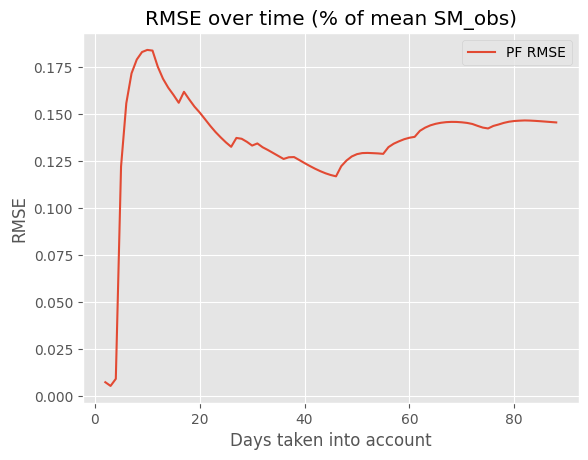

In [15]:
SM_DA  = results.loc[(results.index >= minDay) & (results.index <= maxDay)]['SM'].to_numpy()
SM_obs = df_obs_under.loc[(df_obs_under['Date/heure'] >= str(minDay)) & (df_obs_under['Date/heure'] <= str(maxDay))]['SM'].to_numpy()
SM_noDA= df_wofost_noDA.loc[(df_wofost_noDA.index >= minDay) & (df_wofost_noDA.index <= maxDay)]['SM'].to_numpy()
rsme = {i:np.sqrt(np.mean((SM_obs[1:i]-SM_DA[1:i])**2)) for i in range(len(SM_DA))}
print("RSME en pourcentage pour un pas de {} avec PF : {}".format(NB_DAYS_DELTA, rsme[len(SM_DA)-1]/np.mean(SM_obs)))
print("RSME témoin sans apprentissage : {}".format(np.sqrt(np.mean((SM_obs-SM_noDA)**2))/np.mean(SM_obs)))
plt.plot(list(rsme.keys()),list(rsme.values())/np.mean(SM_obs), label="PF RMSE")
plt.title("RMSE over time (% of mean SM_obs)")
plt.xlabel("Days taken into account")
plt.ylabel("RMSE")
plt.legend()

On peut tirer plusieurs conclusion de ce dernier graphique. Le RMSE est initalement très grand: le PF n'est pas très efficace. Après plusieurs itérations, il se stagne vers 0.035 d'écart, ce qui correspond à 17,5% d'écarts sur la période.
<style>
    table {
        width: 100%;
    }
</style>
| Pas des jours | Erreur RMSE (%) |
|---------------|------- |
|1|10.7|
| 2             | 11,6  |
| 4             | 10,5   |
| 8             | 10,6  |
| 10            | 16,6    |
| témoin        | 15    | 
